In [3]:
# 1. IMPORT LIBRARIES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import (classification_report, confusion_matrix, accuracy_score,
                           precision_score, recall_score, f1_score, roc_auc_score, roc_curve)
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import warnings
warnings.filterwarnings("ignore")

# Set style untuk visualisasi
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

print("="*70)
print("MOVIE SUCCESS PREDICTION - MACHINE LEARNING PROJECT")
print("="*70)


MOVIE SUCCESS PREDICTION - MACHINE LEARNING PROJECT


#DATA UNDERSTANDING

## load dataset

In [4]:

print("\n DATA LOADING DAN INITIAL EXPLORATION")
print("-"*50)

# Load dataset
file_path = '/content/Movies Recommendation.csv'
df = pd.read_csv(file_path)

print(f"Dataset shape: {df.shape}")
print(f"Dataset berhasil dimuat dengan {df.shape[0]} baris dan {df.shape[1]} kolom")



 DATA LOADING DAN INITIAL EXPLORATION
--------------------------------------------------
Dataset shape: (272, 21)
Dataset berhasil dimuat dengan 272 baris dan 21 kolom


## informasi dataset

In [5]:
print("\nInformasi Dataset:")
df.info()



Informasi Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 272 entries, 0 to 271
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Movie_ID                  272 non-null    int64  
 1   Movie_Title               272 non-null    object 
 2   Movie_Genre               272 non-null    object 
 3   Movie_Language            272 non-null    object 
 4   Movie_Budget              272 non-null    int64  
 5   Movie_Popularity          272 non-null    float64
 6   Movie_Release_Date        272 non-null    object 
 7   Movie_Revenue             272 non-null    int64  
 8   Movie_Runtime             272 non-null    int64  
 9   Movie_Vote                272 non-null    float64
 10  Movie_Vote_Count          272 non-null    int64  
 11  Movie_Homepage            121 non-null    object 
 12  Movie_Keywords            271 non-null    object 
 13  Movie_Overview            272 non-null    obj

In [6]:
print("\n5 Baris Pertama Dataset:")
display(df.head())


5 Baris Pertama Dataset:


,Movie_ID,Movie_Title,Movie_Genre,Movie_Language,Movie_Budget,Movie_Popularity,Movie_Release_Date,Movie_Revenue,Movie_Runtime,Movie_Vote,...,Movie_Homepage,Movie_Keywords,Movie_Overview,Movie_Production_House,Movie_Production_Country,Movie_Spoken_Language,Movie_Tagline,Movie_Cast,Movie_Crew,Movie_Director
0,1,Four Rooms,Crime Comedy,en,4000000,22.876230,09-12-1995,4300000,98,6.5,...,NaN,hotel new year's eve witch bet hotel room,It's Ted the Bellhop's first night on the job....,"[{""name"": ""Miramax Films"", ""id"": 14}, {""name"":...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...","[{""iso_639_1"": ""en"", ""name"": ""English""}]",Twelve outrageous guests. Four scandalous requ...,Tim Roth Antonio Banderas Jennifer Beals Madon...,"[{'name': 'Allison Anders', 'gender': 1, 'depa...",Allison Anders
1,2,Star Wars,Adventure Action Science Fiction,en,11000000,126.393695,25-05-1977,775398007,121,8.1,...,http://www.starwars.com/films/star-wars-episod...,android galaxy hermit death star lightsaber,Princess Leia is captured and held hostage by ...,"[{""name"": ""Lucasfilm"", ""id"": 1}, {""name"": ""Twe...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...","[{""iso_639_1"": ""en"", ""name"": ""English""}]","A long time ago in a galaxy far, far away...",Mark Hamill Harrison Ford Carrie Fisher Peter ...,"[{'name': 'George Lucas', 'gender': 2, 'depart...",George Lucas
2,3,Finding Nemo,Animation Family,en,94000000,85.688789,30-05-2003,940335536,100,7.6,...,http://movies.disney.com/finding-nemo,father son relationship harbor underwater fish...,"Nemo, an adventurous young clownfish, is unexp...","[{""name"": ""Pixar Animation Studios"", ""id"": 3}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...","[{""iso_639_1"": ""en"", ""name"": ""English""}]","There are 3.7 trillion fish in the ocean, they...",Albert Brooks Ellen DeGeneres Alexander Gould ...,"[{'name': 'Andrew Stanton', 'gender': 2, 'depa...",Andrew Stanton
3,4,Forrest Gump,Comedy Drama Romance,en,55000000,138.133331,06-07-1994,677945399,142,8.2,...,NaN,vietnam veteran hippie mentally disabled runni...,A man with a low IQ has accomplished great thi...,"[{""name"": ""Paramount Pictures"", ""id"": 4}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...","[{""iso_639_1"": ""en"", ""name"": ""English""}]","The world will never be the same, once you've ...",Tom Hanks Robin Wright Gary Sinise Mykelti Wil...,"[{'name': 'Alan Silvestri', 'gender': 2, 'depa...",Robert Zemeckis
4,5,American Beauty,Drama,en,15000000,80.878605,15-09-1999,356296601,122,7.9,...,http://www.dreamworks.com/ab/,male nudity female nudity adultery midlife cri...,"Lester Burnham, a depressed suburban father in...","[{""name"": ""DreamWorks SKG"", ""id"": 27}, {""name""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...","[{""iso_639_1"": ""en"", ""name"": ""English""}]",Look closer.,Kevin Spacey Annette Bening Thora Birch Wes Be...,"[{'name': 'Thomas Newman', 'gender': 2, 'depar...",Sam Mendes


In [7]:
print("\nStatistik Deskriptif:")
display(df.describe())


Statistik Deskriptif:


,Movie_ID,Movie_Budget,Movie_Popularity,Movie_Revenue,Movie_Runtime,Movie_Vote,Movie_Vote_Count
count,272.000000,2.720000e+02,272.000000,2.720000e+02,272.000000,272.000000,272.000000
mean,136.500000,4.197453e+07,46.604872,2.065009e+08,123.279412,7.069853,1908.441176
std,78.663842,5.101370e+07,35.990145,2.590300e+08,25.551393,0.805545,1963.480007
min,1.000000,0.000000e+00,0.895946,0.000000e+00,78.000000,3.500000,23.000000
25%,68.750000,6.850000e+06,21.088627,3.189623e+07,106.000000,6.700000,527.750000
50%,136.500000,2.350000e+07,39.040441,1.060641e+08,119.000000,7.100000,1200.000000
75%,204.250000,6.000000e+07,60.716904,2.884413e+08,133.250000,7.600000,2704.250000
max,272.000000,3.000000e+08,271.972889,1.845034e+09,229.000000,8.500000,12002.000000


##analisis dataset

In [8]:
 #Analisis tipe data
print("\nTipe Data Setiap Kolom:")
for col in df.columns:
    print(f"{col}: {df[col].dtype} - {df[col].nunique()} unique values")



Tipe Data Setiap Kolom:
Movie_ID: int64 - 272 unique values
Movie_Title: object - 272 unique values
Movie_Genre: object - 153 unique values
Movie_Language: object - 11 unique values
Movie_Budget: int64 - 124 unique values
Movie_Popularity: float64 - 272 unique values
Movie_Release_Date: object - 268 unique values
Movie_Revenue: int64 - 258 unique values
Movie_Runtime: int64 - 93 unique values
Movie_Vote: float64 - 37 unique values
Movie_Vote_Count: int64 - 257 unique values
Movie_Homepage: object - 118 unique values
Movie_Keywords: object - 270 unique values
Movie_Overview: object - 272 unique values
Movie_Production_House: object - 233 unique values
Movie_Production_Country: object - 56 unique values
Movie_Spoken_Language: object - 84 unique values
Movie_Tagline: object - 257 unique values
Movie_Cast: object - 261 unique values
Movie_Crew: object - 271 unique values
Movie_Director: object - 173 unique values


#EXPLORATORY DATA ANALYSIS (EDA)

##Analisis Missing Values

In [9]:
print("\n3. EXPLORATORY DATA ANALYSIS")
print("-"*50)

# Analisis Missing Values
print("ANALISIS MISSING VALUES:")
missing_values = df.isnull().sum()
missing_percent = (missing_values / len(df)) * 100
missing_df = pd.DataFrame({
    'Missing_Count': missing_values,
    'Missing_Percentage': missing_percent
}).sort_values('Missing_Percentage', ascending=False)

print("Missing Values per Kolom:")
display(missing_df[missing_df['Missing_Count'] > 0])



3. EXPLORATORY DATA ANALYSIS
--------------------------------------------------
ANALISIS MISSING VALUES:
Missing Values per Kolom:


,Missing_Count,Missing_Percentage
Movie_Homepage,151,55.514706
Movie_Tagline,15,5.514706
Movie_Director,3,1.102941
Movie_Keywords,1,0.367647
Movie_Cast,1,0.367647
Movie_Crew,1,0.367647


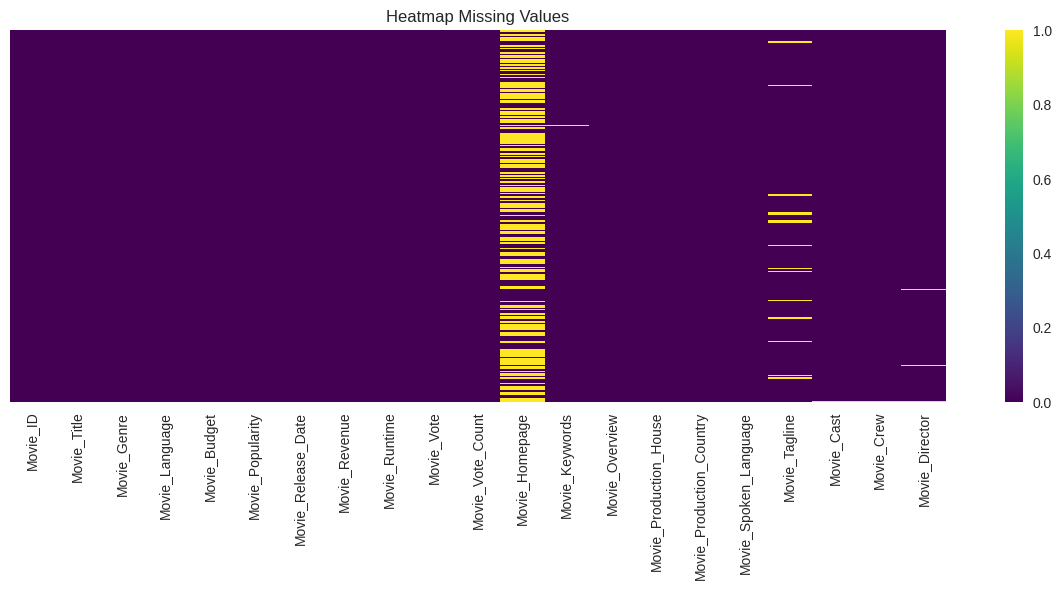

In [10]:
 #Visualisasi Missing Values
plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(), cbar=True, yticklabels=False, cmap='viridis')
plt.title('Heatmap Missing Values')
plt.tight_layout()
plt.show()


In [11]:
# Identifikasi kolom dengan missing values tinggi
high_missing_cols = missing_df[missing_df['Missing_Percentage'] > 50].index.tolist()
print(f"\nKolom dengan missing values >50%: {high_missing_cols}")



Kolom dengan missing values >50%: ['Movie_Homepage']


##Analisis Target Variable (Movie_Revenue)

In [12]:
print("\nANALISIS TARGET VARIABLE (MOVIE_REVENUE):")
revenue_stats = df['Movie_Revenue'].describe()
print("Statistik Revenue:")
display(revenue_stats)


ANALISIS TARGET VARIABLE (MOVIE_REVENUE):
Statistik Revenue:


,Movie_Revenue
count,2.720000e+02
mean,2.065009e+08
std,2.590300e+08
min,0.000000e+00
25%,3.189623e+07
50%,1.060641e+08
75%,2.884413e+08
max,1.845034e+09


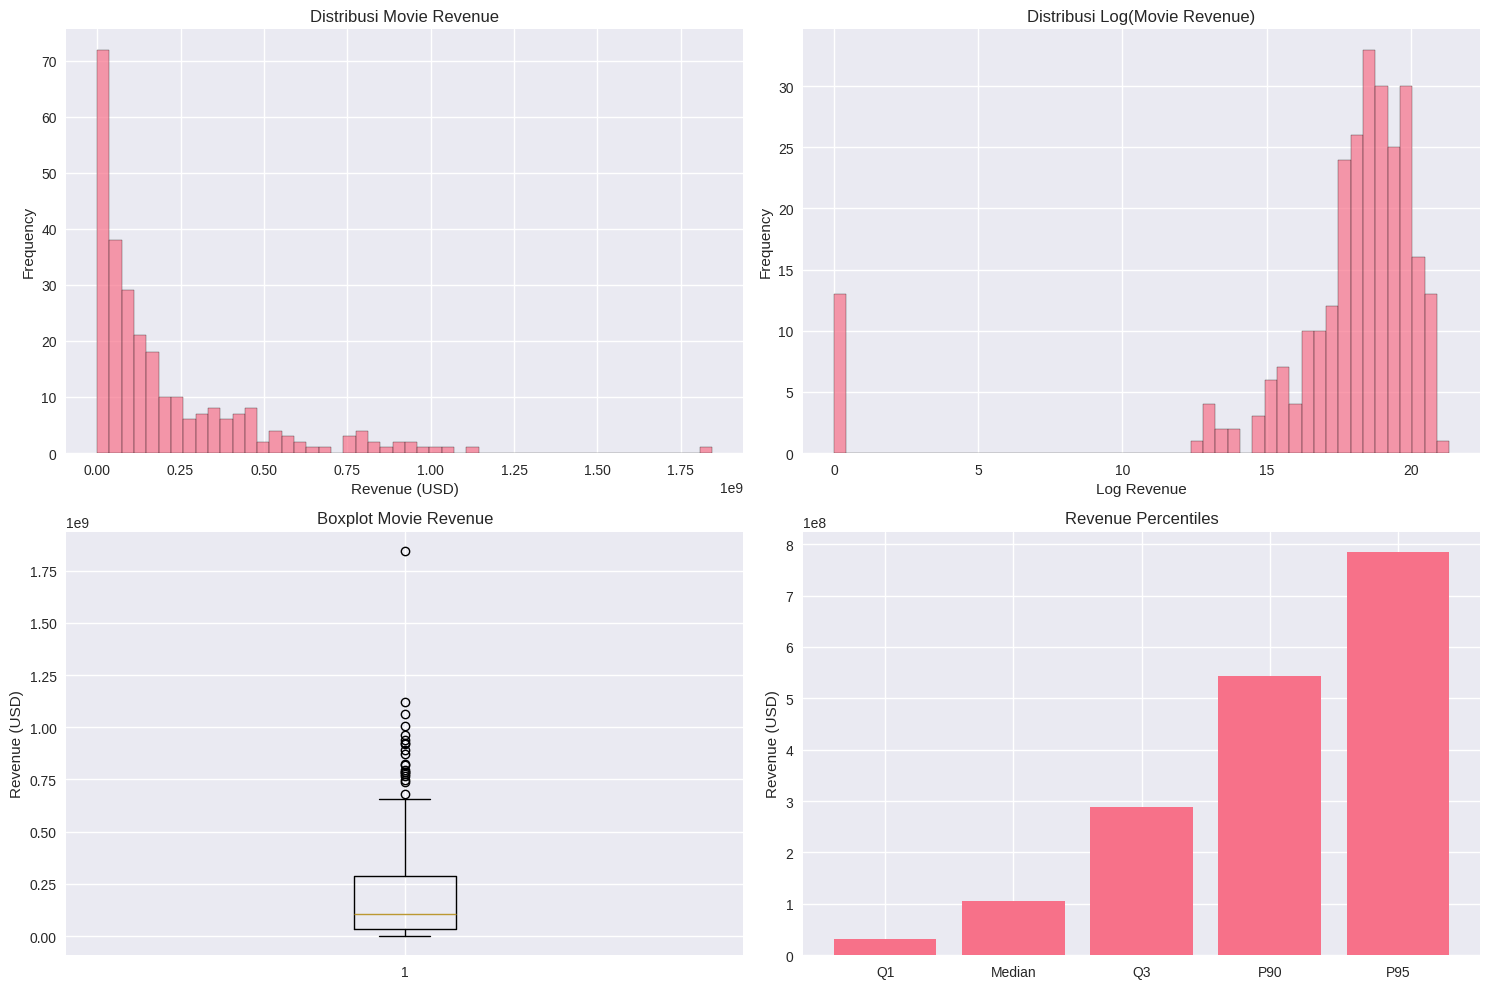

In [13]:
 #Visualisasi distribusi revenue
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Histogram revenue
axes[0,0].hist(df['Movie_Revenue'].dropna(), bins=50, edgecolor='black', alpha=0.7)
axes[0,0].set_title('Distribusi Movie Revenue')
axes[0,0].set_xlabel('Revenue (USD)')
axes[0,0].set_ylabel('Frequency')

# Log transformation
axes[0,1].hist(np.log1p(df['Movie_Revenue'].dropna()), bins=50, edgecolor='black', alpha=0.7)
axes[0,1].set_title('Distribusi Log(Movie Revenue)')
axes[0,1].set_xlabel('Log Revenue')
axes[0,1].set_ylabel('Frequency')

# Boxplot
axes[1,0].boxplot(df['Movie_Revenue'].dropna())
axes[1,0].set_title('Boxplot Movie Revenue')
axes[1,0].set_ylabel('Revenue (USD)')

# Revenue percentiles
percentiles = np.percentile(df['Movie_Revenue'].dropna(), [25, 50, 75, 90, 95])
axes[1,1].bar(['Q1', 'Median', 'Q3', 'P90', 'P95'], percentiles)
axes[1,1].set_title('Revenue Percentiles')
axes[1,1].set_ylabel('Revenue (USD)')

plt.tight_layout()
plt.show()


## Analisis fitur numerik


Fitur Numerik: ['Movie_ID', 'Movie_Budget', 'Movie_Popularity', 'Movie_Revenue', 'Movie_Runtime', 'Movie_Vote', 'Movie_Vote_Count']


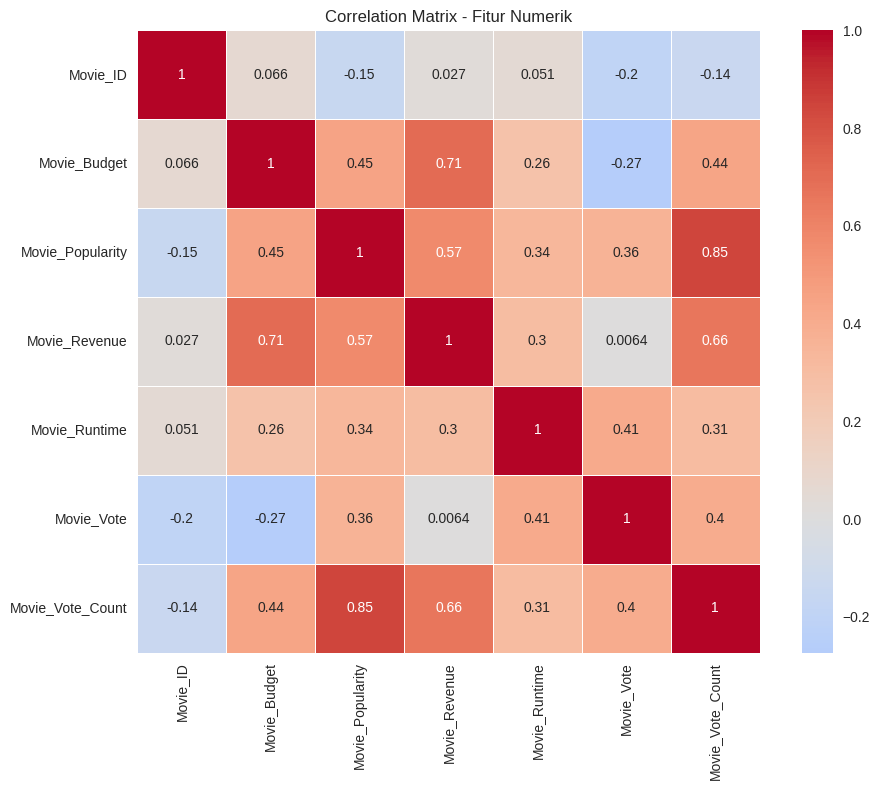

In [14]:
numeric_features = df.select_dtypes(include=[np.number]).columns.tolist()
print(f"\nFitur Numerik: {numeric_features}")

# Correlation analysis untuk fitur numerik
numeric_df = df[numeric_features].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df, annot=True, cmap='coolwarm', center=0, square=True, linewidths=0.5)
plt.title('Correlation Matrix - Fitur Numerik')
plt.tight_layout()
plt.show()


#DATA PREPARATION

In [15]:
print("\n4. DATA PREPARATION")
print("-"*50)

# Buat copy dataset untuk preprocessing
df_processed = df.copy()



4. DATA PREPARATION
--------------------------------------------------


In [16]:
# LANGKAH 1: Drop kolom yang tidak relevan atau menyebabkan data leakage
print("LANGKAH 1: FEATURE SELECTION")
cols_to_drop = [
    'Movie_Homepage', 'Movie_Overview', 'Movie_Tagline',
    'Movie_Keywords', 'Movie_Cast', 'Movie_Crew',
    'Movie_Revenue'  # PENTING: Dihapus untuk mencegah data leakage
]

# Hapus kolom yang ada
existing_cols_to_drop = [col for col in cols_to_drop if col in df_processed.columns]
print(f"Menghapus kolom: {existing_cols_to_drop}")
df_processed.drop(columns=existing_cols_to_drop, inplace=True)

print(f"Shape setelah drop kolom: {df_processed.shape}")

LANGKAH 1: FEATURE SELECTION
Menghapus kolom: ['Movie_Homepage', 'Movie_Overview', 'Movie_Tagline', 'Movie_Keywords', 'Movie_Cast', 'Movie_Crew', 'Movie_Revenue']
Shape setelah drop kolom: (272, 14)


In [17]:
# LANGKAH 2: Buat target variable
print("\nLANGKAH 2: PEMBUATAN TARGET VARIABLE")
# Definisi kesuksesan: film dengan revenue >= $50 juta
SUCCESS_THRESHOLD = 50000000  # $50 juta USD

# Buat label berdasarkan threshold
df_processed['Success_Label'] = df['Movie_Revenue'].apply(
    lambda x: 1 if x >= SUCCESS_THRESHOLD else 0
)

# Analisis distribusi target
target_counts = df_processed['Success_Label'].value_counts()
target_percent = df_processed['Success_Label'].value_counts(normalize=True) * 100

print(f"Threshold kesuksesan: ${SUCCESS_THRESHOLD:,}")
print("Distribusi Target:")
print(f"Tidak Sukses (0): {target_counts[0]} film ({target_percent[0]:.1f}%)")
print(f"Sukses (1): {target_counts[1]} film ({target_percent[1]:.1f}%)")



LANGKAH 2: PEMBUATAN TARGET VARIABLE
Threshold kesuksesan: $50,000,000
Distribusi Target:
Tidak Sukses (0): 87 film (32.0%)
Sukses (1): 185 film (68.0%)


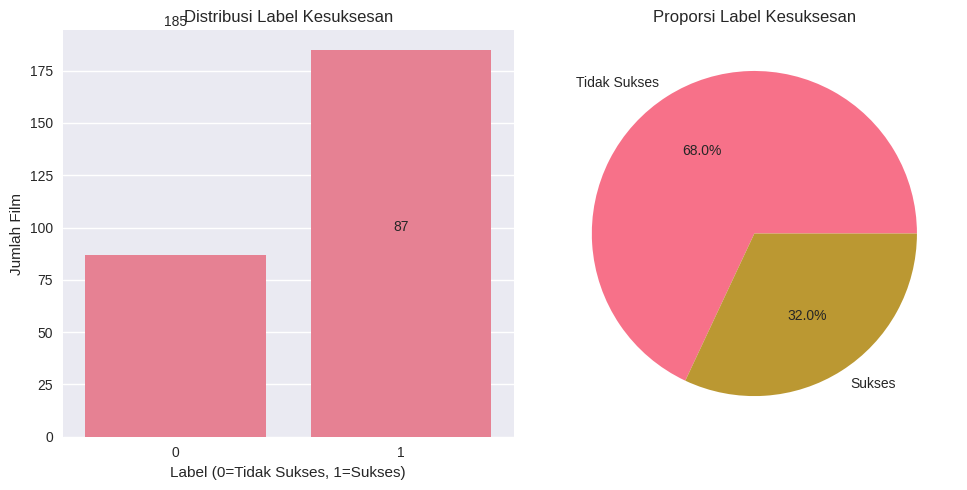

In [18]:
# Visualisasi target distribution
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
sns.countplot(data=df_processed, x='Success_Label')
plt.title('Distribusi Label Kesuksesan')
plt.xlabel('Label (0=Tidak Sukses, 1=Sukses)')
plt.ylabel('Jumlah Film')
for i, v in enumerate(target_counts):
    plt.text(i, v + 10, str(v), ha='center', va='bottom')

plt.subplot(1, 2, 2)
plt.pie(target_counts.values, labels=['Tidak Sukses', 'Sukses'], autopct='%1.1f%%')
plt.title('Proporsi Label Kesuksesan')

plt.tight_layout()
plt.show()


In [19]:
# LANGKAH 3: Handle missing values
print("\nLANGKAH 3: PENANGANAN MISSING VALUES")

# Identifikasi kolom numerik dan kategorikal
numeric_cols = df_processed.select_dtypes(include=[np.number]).columns.tolist()
categorical_cols = df_processed.select_dtypes(include=['object']).columns.tolist()



LANGKAH 3: PENANGANAN MISSING VALUES


In [20]:
# Remove target dari numeric_cols
if 'Success_Label' in numeric_cols:
    numeric_cols.remove('Success_Label')

print(f"Kolom numerik: {numeric_cols}")
print(f"Kolom kategorikal: {categorical_cols}")

Kolom numerik: ['Movie_ID', 'Movie_Budget', 'Movie_Popularity', 'Movie_Runtime', 'Movie_Vote', 'Movie_Vote_Count']
Kolom kategorikal: ['Movie_Title', 'Movie_Genre', 'Movie_Language', 'Movie_Release_Date', 'Movie_Production_House', 'Movie_Production_Country', 'Movie_Spoken_Language', 'Movie_Director']


In [21]:
# Handle missing values untuk numerik (gunakan median)
for col in numeric_cols:
    if df_processed[col].isnull().sum() > 0:
        median_val = df_processed[col].median()
        missing_count = df_processed[col].isnull().sum()
        df_processed[col].fillna(median_val, inplace=True)
        print(f"Mengisi {missing_count} missing values pada {col} dengan median: {median_val}")


In [22]:
# Handle missing values untuk kategorikal (gunakan mode atau 'Unknown')
for col in categorical_cols:
    if df_processed[col].isnull().sum() > 0:
        mode_val = df_processed[col].mode()[0] if len(df_processed[col].mode()) > 0 else 'Unknown'
        missing_count = df_processed[col].isnull().sum()
        df_processed[col].fillna(mode_val, inplace=True)
        print(f"Mengisi {missing_count} missing values pada {col} dengan mode: {mode_val}")


Mengisi 3 missing values pada Movie_Director dengan mode: Steven Spielberg


In [23]:
# Drop rows dengan missing values yang tersisa
initial_rows = len(df_processed)
df_processed.dropna(inplace=True)
final_rows = len(df_processed)
dropped_rows = initial_rows - final_rows
if dropped_rows > 0:
    print(f"Menghapus {dropped_rows} baris dengan missing values tersisa")

print(f"Shape final: {df_processed.shape}")


Shape final: (272, 15)


In [24]:
 #LANGKAH 4: Feature Engineering
print("\nLANGKAH 4: FEATURE ENGINEERING")

# Encode categorical variables
le_dict = {}
for col in categorical_cols:
    if col in df_processed.columns and len(df_processed[col].unique()) > 1:
        le = LabelEncoder()
        df_processed[col + '_encoded'] = le.fit_transform(df_processed[col].astype(str))
        le_dict[col] = le
        print(f"Encode {col}: {len(le.classes_)} kategori unik")



LANGKAH 4: FEATURE ENGINEERING
Encode Movie_Title: 272 kategori unik
Encode Movie_Genre: 153 kategori unik
Encode Movie_Language: 11 kategori unik
Encode Movie_Release_Date: 268 kategori unik
Encode Movie_Production_House: 233 kategori unik
Encode Movie_Production_Country: 56 kategori unik
Encode Movie_Spoken_Language: 84 kategori unik
Encode Movie_Director: 173 kategori unik


In [25]:
# Pilih fitur untuk modeling
base_features = ['Movie_Budget', 'Movie_Popularity', 'Movie_Runtime',
                'Movie_Vote', 'Movie_Vote_Count']
encoded_features = [col for col in df_processed.columns if col.endswith('_encoded')]


In [26]:
# Gabungkan semua fitur yang tersedia
all_features = base_features + encoded_features
available_features = [col for col in all_features if col in df_processed.columns]

print(f"Fitur yang tersedia untuk modeling: {available_features}")
print(f"Total fitur: {len(available_features)}")


Fitur yang tersedia untuk modeling: ['Movie_Budget', 'Movie_Popularity', 'Movie_Runtime', 'Movie_Vote', 'Movie_Vote_Count', 'Movie_Title_encoded', 'Movie_Genre_encoded', 'Movie_Language_encoded', 'Movie_Release_Date_encoded', 'Movie_Production_House_encoded', 'Movie_Production_Country_encoded', 'Movie_Spoken_Language_encoded', 'Movie_Director_encoded']
Total fitur: 13


In [27]:
# LANGKAH 5: Data Splitting dan Scaling
print("\nLANGKAH 5: DATA SPLITTING DAN SCALING")

# Prepare X dan y
X = df_processed[available_features]
y = df_processed['Success_Label']

print(f"Shape X: {X.shape}")
print(f"Shape y: {y.shape}")



LANGKAH 5: DATA SPLITTING DAN SCALING
Shape X: (272, 13)
Shape y: (272,)


In [28]:
# Train-test split dengan stratification
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Training set: {X_train.shape}")
print(f"Test set: {X_test.shape}")
print(f"Training target distribusi: {np.bincount(y_train)}")
print(f"Test target distribusi: {np.bincount(y_test)}")


Training set: (217, 13)
Test set: (55, 13)
Training target distribusi: [ 69 148]
Test target distribusi: [18 37]


In [29]:
# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Feature scaling menggunakan StandardScaler telah diterapkan")


Feature scaling menggunakan StandardScaler telah diterapkan



Korelasi Fitur dengan Target (nilai absolut):


,0
Movie_Budget,0.412014
Movie_Popularity,0.371390
Movie_Vote_Count,0.366874
Movie_Language_encoded,0.184327
Movie_Vote,0.118342
Movie_Runtime,0.115953
Movie_Spoken_Language_encoded,0.082221
Movie_Genre_encoded,0.081550
Movie_Production_House_encoded,0.072610
Movie_Release_Date_encoded,0.062373


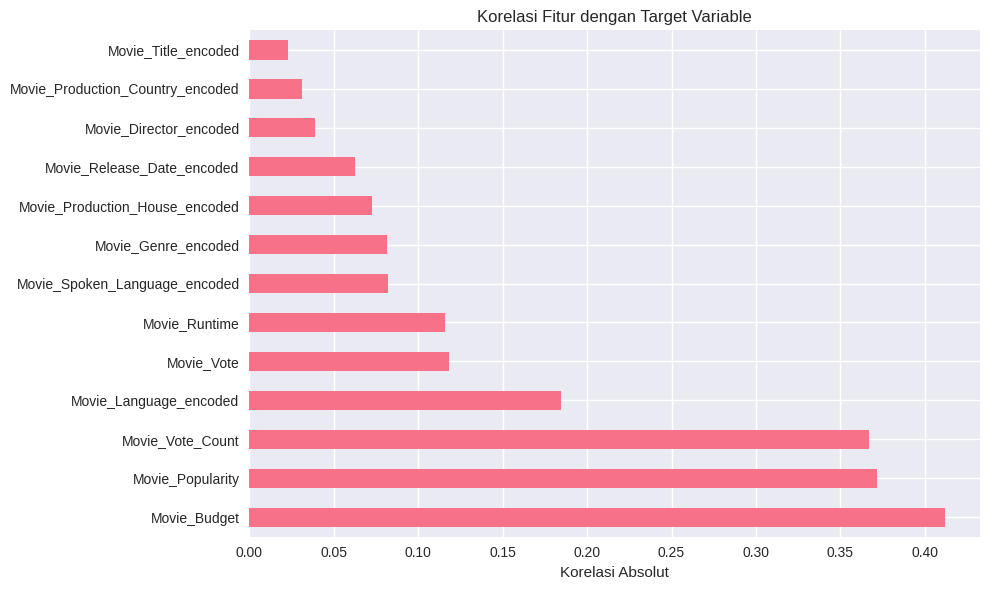

In [30]:
# Analisis korelasi fitur dengan target
correlation_with_target = X_train.corrwith(y_train).abs().sort_values(ascending=False)
print("\nKorelasi Fitur dengan Target (nilai absolut):")
display(correlation_with_target)

# Visualisasi korelasi
plt.figure(figsize=(10, 6))
correlation_with_target.plot(kind='barh')
plt.title('Korelasi Fitur dengan Target Variable')
plt.xlabel('Korelasi Absolut')
plt.tight_layout()
plt.show()


#MODELING

In [31]:
print("\n5. MODELING")
print("-"*50)

# Definisi model dan parameter untuk tuning
models_config = {
    'Decision Tree': {
        'model': DecisionTreeClassifier(random_state=42),
        'params': {
            'max_depth': [3, 5, 7, 10, None],
            'min_samples_split': [2, 5, 10],
            'min_samples_leaf': [1, 2, 4],
            'criterion': ['gini', 'entropy']
        }
    },
    'Random Forest': {
        'model': RandomForestClassifier(random_state=42, n_jobs=-1),
        'params': {
            'n_estimators': [50, 100, 200],
            'max_depth': [3, 5, 7, 10, None],
            'min_samples_split': [2, 5, 10],
            'min_samples_leaf': [1, 2, 4]
        }
    },
    'XGBoost': {
        'model': XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
        'params': {
            'n_estimators': [50, 100, 200],
            'max_depth': [3, 5, 7],
            'learning_rate': [0.01, 0.1, 0.2],
            'subsample': [0.8, 0.9, 1.0]
        }
    }
}


5. MODELING
--------------------------------------------------


In [32]:
results = {}
best_models = {}

print("BASELINE MODEL TRAINING")
print("-"*30)

# Train baseline models (tanpa tuning)
baseline_results = {}
for name, config in models_config.items():
    print(f"\nTraining baseline {name}...")
    # Train baseline model
    baseline_model = config['model']
    baseline_model.fit(X_train_scaled, y_train)

    # Predictions
    y_pred_baseline = baseline_model.predict(X_test_scaled)
    y_proba_baseline = baseline_model.predict_proba(X_test_scaled)[:, 1]

    # Calculate metrics
    baseline_acc = accuracy_score(y_test, y_pred_baseline)
    baseline_precision = precision_score(y_test, y_pred_baseline)
    baseline_recall = recall_score(y_test, y_pred_baseline)
    baseline_f1 = f1_score(y_test, y_pred_baseline)
    baseline_auc = roc_auc_score(y_test, y_proba_baseline)

    baseline_results[name] = {
        'accuracy': baseline_acc,
        'precision': baseline_precision,
        'recall': baseline_recall,
        'f1_score': baseline_f1,
        'auc_score': baseline_auc
    }

    print(f"Baseline {name} - Accuracy: {baseline_acc:.4f}, F1: {baseline_f1:.4f}, AUC: {baseline_auc:.4f}")


BASELINE MODEL TRAINING
------------------------------

Training baseline Decision Tree...
Baseline Decision Tree - Accuracy: 0.7455, F1: 0.8250, AUC: 0.6682

Training baseline Random Forest...
Baseline Random Forest - Accuracy: 0.8545, F1: 0.9024, AUC: 0.8348

Training baseline XGBoost...
Baseline XGBoost - Accuracy: 0.8000, F1: 0.8675, AUC: 0.8123


In [33]:
print("\nHYPERPARAMETER TUNING & MODEL IMPROVEMENT")
print("-"*45)

# Hyperparameter tuning untuk improvement
for name, config in models_config.items():
    print(f"\nTuning {name}...")

    # GridSearchCV untuk hyperparameter tuning
    grid_search = GridSearchCV(
        config['model'],
        config['params'],
        cv=5,
        scoring='f1',  # Fokus pada F1-score untuk balanced performance
        n_jobs=-1,
        verbose=0
    )

    # Fit dengan data training
    grid_search.fit(X_train_scaled, y_train)

    # Simpan best model
    best_models[name] = grid_search.best_estimator_

    # Cross-validation scores
    cv_scores = cross_val_score(grid_search.best_estimator_, X_train_scaled, y_train, cv=5, scoring='f1')

    # Predictions
    y_train_pred = grid_search.best_estimator_.predict(X_train_scaled)
    y_test_pred = grid_search.best_estimator_.predict(X_test_scaled)
    y_test_proba = grid_search.best_estimator_.predict_proba(X_test_scaled)[:, 1]

    # Calculate comprehensive metrics
    train_acc = accuracy_score(y_train, y_train_pred)
    test_acc = accuracy_score(y_test, y_test_pred)
    precision = precision_score(y_test, y_test_pred)
    recall = recall_score(y_test, y_test_pred)
    f1 = f1_score(y_test, y_test_pred)
    auc = roc_auc_score(y_test, y_test_proba)

    # Store results
    results[name] = {
        'best_params': grid_search.best_params_,
        'cv_mean': cv_scores.mean(),
        'cv_std': cv_scores.std(),
        'train_accuracy': train_acc,
        'test_accuracy': test_acc,
        'precision': precision,
        'recall': recall,
        'f1_score': f1,
        'auc_score': auc,
        'y_test_pred': y_test_pred,
        'y_test_proba': y_test_proba,
        'baseline_f1': baseline_results[name]['f1_score'],
        'improvement': f1 - baseline_results[name]['f1_score']
    }

    print(f"Best parameters: {grid_search.best_params_}")
    print(f"CV F1-Score: {cv_scores.mean():.4f} (+/- {cv_scores.std() * 2:.4f})")
    print(f"Test Accuracy: {test_acc:.4f}")
    print(f"Test F1-Score: {f1:.4f}")
    print(f"Improvement dari baseline: {f1 - baseline_results[name]['f1_score']:+.4f}")


HYPERPARAMETER TUNING & MODEL IMPROVEMENT
---------------------------------------------

Tuning Decision Tree...
Best parameters: {'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}
CV F1-Score: 0.8543 (+/- 0.1005)
Test Accuracy: 0.8000
Test F1-Score: 0.8706
Improvement dari baseline: +0.0456

Tuning Random Forest...
Best parameters: {'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100}
CV F1-Score: 0.8864 (+/- 0.0803)
Test Accuracy: 0.8364
Test F1-Score: 0.8916
Improvement dari baseline: -0.0109

Tuning XGBoost...
Best parameters: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.8}
CV F1-Score: 0.8801 (+/- 0.0747)
Test Accuracy: 0.7091
Test F1-Score: 0.8222
Improvement dari baseline: -0.0452


#EVALUATION

In [34]:
print("\n6. MODEL EVALUATION & COMPARISON")
print("-"*50)

# Buat comparison dataframe
comparison_data = []
for name in results.keys():
    comparison_data.append({
        'Model': name,
        'CV_F1_Mean': results[name]['cv_mean'],
        'CV_F1_Std': results[name]['cv_std'],
        'Train_Accuracy': results[name]['train_accuracy'],
        'Test_Accuracy': results[name]['test_accuracy'],
        'Precision': results[name]['precision'],
        'Recall': results[name]['recall'],
        'F1_Score': results[name]['f1_score'],
        'AUC_Score': results[name]['auc_score'],
        'Baseline_F1': results[name]['baseline_f1'],
        'Improvement': results[name]['improvement']
    })

comparison_df = pd.DataFrame(comparison_data)

print("PERBANDINGAN PERFORMA MODEL:")
display(comparison_df.round(4))



6. MODEL EVALUATION & COMPARISON
--------------------------------------------------
PERBANDINGAN PERFORMA MODEL:


,Model,CV_F1_Mean,CV_F1_Std,Train_Accuracy,Test_Accuracy,Precision,Recall,F1_Score,AUC_Score,Baseline_F1,Improvement
0,Decision Tree,0.8543,0.0503,0.8664,0.8000,0.7708,1.0,0.8706,0.8086,0.8250,0.0456
1,Random Forest,0.8864,0.0402,0.9263,0.8364,0.8043,1.0,0.8916,0.8393,0.9024,-0.0109
2,XGBoost,0.8801,0.0373,0.8894,0.7091,0.6981,1.0,0.8222,0.8168,0.8675,-0.0452


In [35]:
# Tentukan model terbaik berdasarkan F1-score
best_model_idx = comparison_df['F1_Score'].idxmax()
best_model_name = comparison_df.loc[best_model_idx, 'Model']
best_f1_score = comparison_df.loc[best_model_idx, 'F1_Score']

print(f"\nMODEL TERBAIK: {best_model_name}")
print(f"F1-Score Terbaik: {best_f1_score:.4f}")



MODEL TERBAIK: Random Forest
F1-Score Terbaik: 0.8916


In [36]:
# Analisis improvement
print("\nANALISIS IMPROVEMENT (Baseline vs Tuned):")
for name in results.keys():
    baseline_f1 = results[name]['baseline_f1']
    tuned_f1 = results[name]['f1_score']
    improvement = results[name]['improvement']
    improvement_pct = (improvement / baseline_f1) * 100

    print(f"{name}:")
    print(f"  Baseline F1: {baseline_f1:.4f}")
    print(f"  Tuned F1:    {tuned_f1:.4f}")
    print(f"  Improvement: {improvement:+.4f} ({improvement_pct:+.1f}%)")



ANALISIS IMPROVEMENT (Baseline vs Tuned):
Decision Tree:
  Baseline F1: 0.8250
  Tuned F1:    0.8706
  Improvement: +0.0456 (+5.5%)
Random Forest:
  Baseline F1: 0.9024
  Tuned F1:    0.8916
  Improvement: -0.0109 (-1.2%)
XGBoost:
  Baseline F1: 0.8675
  Tuned F1:    0.8222
  Improvement: -0.0452 (-5.2%)


In [39]:
 #Detailed evaluation untuk setiap model
print("\nDETAILED EVALUATION:")
print("="*50)

for name in results.keys():
    result = results[name]
    print(f"\n{name.upper()}")
    print("-" * len(name))
    print(f"Best Parameters: {result['best_params']}")
    print(f"Cross-Validation F1: {result['cv_mean']:.4f} (+/- {result['cv_std']*2:.4f})")
    print(f"Training Accuracy: {result['train_accuracy']:.4f}")
    print(f"Test Accuracy: {result['test_accuracy']:.4f}")
    print(f"Precision: {result['precision']:.4f}")
    print(f"Recall: {result['recall']:.4f}")
    print(f"F1-Score: {result['f1_score']:.4f}")
    print(f"AUC Score: {result['auc_score']:.4f}")

    # Analisis overfitting
    train_test_diff = result['train_accuracy'] - result['test_accuracy']
    if train_test_diff > 0.05:
        print(f"⚠️  Possible overfitting (train-test diff: {train_test_diff:.4f})")
    else:
        print(f"✅ Good generalization (train-test diff: {train_test_diff:.4}")


DETAILED EVALUATION:

DECISION TREE
-------------
Best Parameters: {'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}
Cross-Validation F1: 0.8543 (+/- 0.1005)
Training Accuracy: 0.8664
Test Accuracy: 0.8000
Precision: 0.7708
Recall: 1.0000
F1-Score: 0.8706
AUC Score: 0.8086
⚠️  Possible overfitting (train-test diff: 0.0664)

RANDOM FOREST
-------------
Best Parameters: {'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100}
Cross-Validation F1: 0.8864 (+/- 0.0803)
Training Accuracy: 0.9263
Test Accuracy: 0.8364
Precision: 0.8043
Recall: 1.0000
F1-Score: 0.8916
AUC Score: 0.8393
⚠️  Possible overfitting (train-test diff: 0.0899)

XGBOOST
-------
Best Parameters: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.8}
Cross-Validation F1: 0.8801 (+/- 0.0747)
Training Accuracy: 0.8894
Test Accuracy: 0.7091
Precision: 0.6981
Recall: 1.0000
F1-Score: 0.8222
AUC Score: 0.8168
⚠️  Possible overfitting (t